# **Q-Learning**

It is the another alogorthim just as the SARSA for the temporal difference learning. It stands for Quantify-learning. 
* Model free learning
* Learns optimal Q-table by interaction.\
![image](6.png)

### **Differences between SARSA and Q-Learning**\
**SARSA**:\
$Q(s,a)=(1-\alpha)Q(s,a)+\alpha(y+\gamma Q(s^{'},a^{'}))$
* Updates based on taken action
* On-policy Learner\
**Q-Learning**:\
$Q(s,a)=(1-\alpha)Q(s,a)+\alpha[r+\gamma_{a^{'}}^{max}Q(s_{'},a_{'})]$
* Updates independent of action taken
* Off-policy Learner


## **Q-LEARNING IMPLEMENTATION**

In [3]:
import numpy as np
import gymnasium as gym


In [14]:
#making a gymansium fozen lake environment
env=gym.make("FrozenLake-v1",is_slippery=True,render_mode='rgb_array')

In [15]:
import matplotlib.pyplot as plt
def render():
    state_image=env.render()
    plt.imshow(state_image)
    plt.show()
    

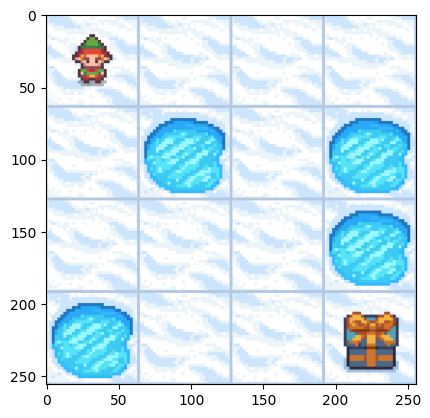

In [16]:
state,info=env.reset(seed=10)
render()

C:\Users\Acer\AppData\Local\Temp\ipykernel_10140\659450590.py:12: RuntimeWarning: overflow encountered in scalar add
  Q[state,action]=(1-alpha)*old_value+(reward+gamma*next_max)


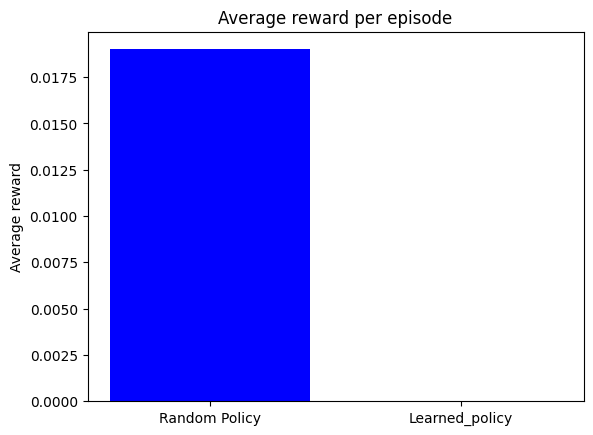

In [23]:
num_episodes=1000
alpha=0.1
gamma=1
num_states,num_actions=env.observation_space.n,env.action_space.n
Q=np.zeros((num_states,num_actions))
reward_per_random_episode=[]
#loop over each of the episodes
def update_q_table(state,action,next_state):
    old_value=Q[state,action]
    #obatain the max of the q-value for the next_state
    next_max=max(Q[next_state])
    Q[state,action]=(1-alpha)*old_value+(reward+gamma*next_max)

for episode in range(num_episodes):
    #reset the environment over every steps
    state,info=env.reset()
    #intially the environment is not terminated
    terminated=False
    episode_reward=0
    #loop untill the terminated condtions are reached
    while not terminated:
        action=env.action_space.sample()
        new_state,reward,terminated,truncated,info=env.step(action)
        #update the q-table based on the state,action and the new_state
        #as in the monte-carlo-method we do not use the new_action because we will update the q-table with the best q-value
        #based on the actio irrespective of the next action to be taken
        update_q_table(state,action,new_state)
        episode_reward +=reward
        state=new_state
    reward_per_random_episode.append(episode_reward)

def update_q_table(state,action,next_state):
    old_value=Q[state,action]
    #obatain the max of the q-value for the next_state
    next_max=max(Q[next_state])
    Q[state,action]=(1-alpha)*old_value+(reward+gamma*next_max)


def get_policy():
    policy={state:np.argmax(Q[state]) for state in range(num_states)}
    return policy
reward_per_learned_episode=[]
policy=get_policy()
for episode in range(num_episodes):
    #select best action based on q-learned table
    new_state,reward,terminated,truncated,info=env.step(action)
    state=new_state
    episode_reward +=reward
    reward_per_learned_episode.append(episode_reward)       

avg_random_reward=np.mean(reward_per_random_episode)
avg_learned_reward=np.mean(reward_per_learned_episode)

#comparing the above two values
plt.bar(['Random Policy','Learned_policy'],[avg_random_reward,avg_learned_reward],color=['blue','green'])
plt.title('Average reward per episode')
plt.ylabel('Average reward')
plt.show()